# Multiple Linear Regression Lab : House Prices

### Overview
Estimate house prices using MLR

### Builds on
None

### Run time
approx. 20 minutes

### Notes


## Step 1 - Load Data

In [1]:
import os
import urllib.request

data_location = "house-sales-full.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'
#data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/house-prices/house-sales-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: house-sales-full.csv


In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

house_prices = pd.read_csv(data_location)
house_prices.sample(10)

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
17572,17573,5/30/07,412500,6204200560,Single Family,5/1/07,432100,0.99,"415,459.00",1,...,2.00,3,7,1988,0,0,218000,173000,98011,False
17913,17914,9/25/06,464500,6430500208,Single Family,9/1/06,414800,0.95,"487,344.00",1,...,2.00,3,7,1921,0,0,224000,339000,98103,False
20576,20577,9/25/09,508000,7559600430,Single Family,9/1/09,351800,0.81,"628,430.00",1,...,2.50,5,8,2003,0,0,230000,419000,98075,False
5154,5155,11/17/10,219950,1773100972,Townhouse,11/1/10,332700,0.76,"287,713.00",1,...,2.25,3,7,2009,0,2,85000,189000,-1,True
14072,14073,3/19/09,310000,4136870240,Single Family,3/1/09,369800,0.85,"364,824.00",1,...,2.50,4,8,1996,0,0,83000,216000,98092,False
18630,18631,4/27/06,596000,6821600160,Single Family,4/1/06,396500,0.91,"654,172.00",1,...,3.00,3,7,1938,0,1,341000,300000,98199,False
23645,23646,1/11/06,427888,8665050620,Single Family,1/1/06,383200,0.88,"485,952.00",1,...,2.50,3,8,1996,0,0,230000,223000,98029,False
10255,10256,8/7/08,1079950,3225059223,Single Family,8/1/08,397900,0.91,"1,181,187.00",1,...,3.50,4,10,2008,0,0,502000,867000,98004,True
6823,6824,10/29/08,205000,2225039095,Single Family,10/1/08,390600,0.90,"228,408.00",1,...,2.50,3,9,2013,0,0,380000,579000,98199,False
12728,12729,11/5/07,397000,3793700060,Single Family,11/1/07,428400,0.98,"403,302.00",1,...,1.75,3,7,1962,0,0,112000,203000,98059,False


In [3]:
house_prices.isna().any()

DocumentID         False
Date               False
SalePrice          False
PropertyID         False
PropertyType       False
ym                 False
zhvi_px            False
zhvi_idx           False
AdjSalePrice       False
NbrLivingUnits     False
SqFtLot            False
SqFtTotLiving      False
SqFtFinBasement    False
Bathrooms          False
Bedrooms           False
BldgGrade          False
YrBuilt            False
YrRenovated        False
TrafficNoise       False
LandVal            False
ImpsVal            False
ZipCode            False
NewConstruction    False
dtype: bool

## Step 2 - Explore Data (EDA)
EDA is a great way to get a sense of the data.  

Try to find answers to the following questions, by looking at the output of `describe` below

- How many 'max' bedrooms do we have? :-)
- Find min/max of 'SalePrice'
- Do you think we have outliers in data

In [4]:
## TODO use 'describe()' function to understand data
house_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
DocumentID,"27,063.00","13,532.00","7,812.56",1.00,"6,766.50","13,532.00","20,297.50","27,063.00"
SalePrice,"27,063.00","511,626.20","342,821.17","3,000.00","329,000.00","425,000.00","590,000.00","11,000,000.00"
PropertyID,"27,063.00","4,680,324,882.08","2,896,350,979.15","1,000,102.00","2,213,000,057.50","3,972,900,140.00","7,504,001,385.00","9,906,000,035.00"
zhvi_px,"27,063.00","390,750.58","37,024.46","311,600.00","357,100.00","400,600.00","421,200.00","435,200.00"
zhvi_idx,"27,063.00",0.90,0.09,0.72,0.82,0.92,0.97,1.00
AdjSalePrice,"27,063.00","570,918.76","380,236.63","3,368.00","366,918.50","475,664.00","655,061.00","11,644,855.00"
NbrLivingUnits,"27,063.00",1.02,0.15,1.00,1.00,1.00,1.00,5.00
SqFtLot,"27,063.00","10,997.68","28,110.66",494.00,"4,257.50","6,636.00","9,450.00","1,024,068.00"
SqFtTotLiving,"27,063.00","2,122.96",939.84,370.00,"1,440.00","1,940.00","2,610.00","10,740.00"
SqFtFinBasement,"27,063.00",275.30,428.71,0.00,0.00,0.00,510.00,"3,500.00"


In [5]:
## any correlated columns?
## TODO : use 'corr' function to verify
house_prices.corr()

,DocumentID,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
DocumentID,1.00,-0.02,0.99,-0.02,-0.02,-0.02,-0.02,-0.11,-0.02,-0.03,-0.01,-0.03,-0.01,0.03,-0.01,-0.04,-0.03,-0.01,-0.01,0.05
SalePrice,-0.02,1.00,-0.02,0.12,0.12,0.98,0.02,0.14,0.68,0.29,0.52,0.32,0.66,0.08,0.09,-0.01,0.79,0.81,-0.02,0.04
PropertyID,0.99,-0.02,1.00,-0.02,-0.02,-0.02,-0.01,-0.11,-0.02,-0.03,-0.01,-0.03,-0.01,0.03,-0.01,-0.04,-0.03,-0.02,-0.01,0.05
zhvi_px,-0.02,0.12,-0.02,1.00,1.00,-0.03,0.02,-0.00,-0.01,0.02,-0.03,0.00,-0.04,-0.06,0.01,0.01,-0.00,-0.02,0.09,-0.02
zhvi_idx,-0.02,0.12,-0.02,1.00,1.00,-0.03,0.02,-0.00,-0.01,0.02,-0.03,0.00,-0.04,-0.06,0.01,0.01,-0.00,-0.02,0.09,-0.02
AdjSalePrice,-0.02,0.98,-0.02,-0.03,-0.03,1.00,0.02,0.14,0.69,0.29,0.52,0.32,0.67,0.08,0.09,-0.02,0.80,0.82,-0.03,0.04
NbrLivingUnits,-0.02,0.02,-0.01,0.02,0.02,0.02,1.00,-0.00,0.05,0.06,0.10,0.16,-0.05,-0.11,0.01,0.08,0.03,-0.00,0.04,-0.05
SqFtLot,-0.11,0.14,-0.11,-0.00,-0.00,0.14,-0.00,1.00,0.21,0.05,0.10,0.08,0.14,0.03,0.01,-0.01,0.08,0.11,0.06,-0.09
SqFtTotLiving,-0.02,0.68,-0.02,-0.01,-0.01,0.69,0.05,0.21,1.00,0.39,0.75,0.62,0.76,0.30,0.05,-0.07,0.47,0.76,-0.10,0.11
SqFtFinBasement,-0.03,0.29,-0.03,0.02,0.02,0.29,0.06,0.05,0.39,1.00,0.26,0.30,0.14,-0.22,0.11,0.05,0.29,0.28,0.10,-0.14


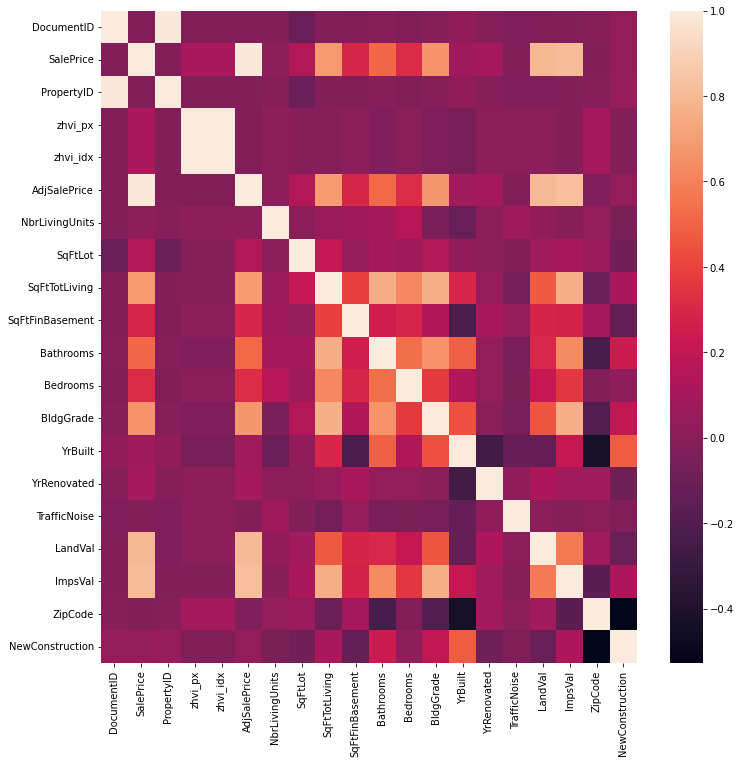

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,12))
sns.heatmap(house_prices.corr())
plt.show()

## Step 3 - Shape Data
Wow! That's a lot of columns.  Maybe we should foucs on just a few of them.

**=> Select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"**

In [7]:
## TODO : select columns
## start with : 'Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'
input_columns= ['Bedrooms',  'Bathrooms', 'SqFtTotLiving', 'SqFtLot']

## TODO : select label column
##  Hint : 'SalePrice'
label_column = ['SalePrice']

house_prices2 = house_prices[input_columns + label_column]
house_prices2

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,SalePrice
0,6,3.00,2400,9373,280000
1,4,3.75,3764,20156,1000000
2,4,1.75,2060,26036,745000
3,5,3.75,3200,8618,425000
4,4,1.75,1720,8620,240000
...,...,...,...,...,...
27058,2,1.75,1410,1161,374000
27059,2,1.75,1410,1005,374000
27060,4,1.00,1070,11170,165000
27061,3,2.00,1345,6223,315000


In [8]:

from sklearn.model_selection import train_test_split

#x = house_prices2[input_columns]
#y = house_prices2[label_column]

#print ("x.shape = ", x.shape)
#print ("y.shape = ", y.shape)

X = house_prices2[input_columns].values

Y = house_prices2[label_column].values

split_test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)

## Step 4 : Run Regression

In [9]:
from sklearn.linear_model import LinearRegression

## TODO : fit (x,y)
model = LinearRegression ().fit(X, Y.ravel())
model

LinearRegression()

## Step 5 : Predict

In [10]:
## TODO Predict on 'x'
predictions = model.predict(X)
predictions

array([429991.82730796, 950801.58545232, 444361.65533633, ...,
       158195.01064552, 316458.05162456, 154251.23178651])

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

a = house_prices2[input_columns  + label_column]
a['predicted_price'] = predictions
a

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,SalePrice,predicted_price
0,6,3.00,2400,9373,280000,"429,991.83"
1,4,3.75,3764,20156,1000000,"950,801.59"
2,4,1.75,2060,26036,745000,"444,361.66"
3,5,3.75,3200,8618,425000,"729,743.95"
4,4,1.75,1720,8620,240000,"351,192.04"
...,...,...,...,...,...,...
27058,2,1.75,1410,1161,374000,"396,038.84"
27059,2,1.75,1410,1005,374000,"396,050.47"
27060,4,1.00,1070,11170,165000,"158,195.01"
27061,3,2.00,1345,6223,315000,"316,458.05"


## Step 6 : Evaluate

**Q==> Are any coefficients close to zero?  What does that mean?**

**Q==> Also inspect R2 value.  Is it decent?**

In [12]:
## coefficients
import numpy as np
np.set_printoptions(precision=2, suppress=True)

print ("coefficients: " , model.coef_)
print ("intercept : ", model.intercept_)

coefficients:  [-65211.74  16274.19    277.85     -0.07]
intercept :  106303.30611508369


In [13]:
## print each feature and it's coefficients
coef = pd.DataFrame({"input_column" : input_columns,  
                     "coefficient": model.coef_[0]})
coef

,input_column,coefficient
0,Bedrooms,"-65,211.74"
1,Bathrooms,"-65,211.74"
2,SqFtTotLiving,"-65,211.74"
3,SqFtLot,"-65,211.74"


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

## TODO : find R2 by comparing 'y' and 'predictions'
print ("R2 : " , r2_score(Y, predictions))

print ("MSE : ", mean_squared_error(Y, predictions))
print ("RMSE : ", sqrt(mean_squared_error(Y, predictions)) )

R2 :  0.4834822523621969
MSE :  60702204448.74506
RMSE :  246378.1736452015


## Step 7 : Predict on New Data

In [15]:
## Create some of your own data
## Bedrooms : 4,  Bathrooms : 3.5,   SqFtTotLiving : 2000, SqFtLot: 3000
new_data = pd.DataFrame({'Bedrooms' : [5,3,4],
                         'Bathrooms' : [3,2, 3.5],
                         'SqFtTotLiving' : [4400, 1800, 2000],
                         'SqFtLot' : [10000, 5000, 3000]
             })
new_data

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
0,5,3.00,4400,10000
1,3,2.00,1800,5000
2,4,3.50,2000,3000


In [16]:
new_prediction = model.predict(new_data)
new_prediction

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1050852.9 ,  442970.11,  457888.41])

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

new_data['predicted_price'] = new_prediction
new_data

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,predicted_price
0,5,3.00,4400,10000,"1,050,852.90"
1,3,2.00,1800,5000,"442,970.11"
2,4,3.50,2000,3000,"457,888.41"


## Step 8 : Improve Model Performance
Now that we have done a 'end-to-end' implementation in Regression.  
How ever our accuracy isn't all that great!  

**Q ==> What can we do to improve our model?**

One option is to choose better input columns.  
in Step-3, add more input columns.
For example you can add 'LandVal' to input columns as follows

```python
input_columns= ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot', 'LandVal']
```

And then run the notebook again, and see if the accuracy goes up!

### Class Competition

Let's see how high you can bring up the model accuracy, with fewest columns as possible.

In [18]:
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
#https://www.datacamp.com/tutorial/feature-selection-python


In [19]:
house_prices2.columns

Index(['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot', 'SalePrice'], dtype='object')

In [20]:
house_prices.columns

Index(['DocumentID', 'Date', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [21]:
#house_prices['DtStamp'] = pd.to_datetime(house_prices['Date']) - pd.datetime(1970,1,1)
#house_prices['Date'].astype('datetime64[ns]')
house_prices['DtStamp'] = pd.to_datetime(house_prices['Date']) - pd.datetime(1970,1,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
house_prices['DtStamp']= house_prices['DtStamp'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [23]:
house_prices.columns

Index(['DocumentID', 'Date', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction', 'DtStamp'],
      dtype='object')

In [24]:
house_prices.head()

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,DtStamp
0,1,9/16/14,280000,1000102,Multiplex,9/1/14,405100,0.93,"300,805.00",2,...,6,7,1991,0,0,70000,229000,98002,False,1410825600000000000
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.93,"1,076,162.00",1,...,4,10,2005,0,0,203000,590000,98166,True,1150416000000000000
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.98,"761,805.00",1,...,4,8,1947,0,0,183000,275000,98166,False,1170028800000000000
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.96,"442,065.00",1,...,5,7,1966,0,0,104000,229000,98168,False,1203897600000000000
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.81,"297,065.00",1,...,4,7,1948,0,0,104000,205000,98168,False,1364515200000000000


In [25]:
house_prices['DtStamp_ym'] = pd.to_datetime(house_prices['ym']) - pd.datetime(1970,1,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [26]:
del house_prices['ym']
del house_prices['Date']

In [27]:
house_prices.head()

,DocumentID,SalePrice,PropertyID,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,DtStamp,DtStamp_ym
0,1,280000,1000102,Multiplex,405100,0.93,"300,805.00",2,9373,2400,...,7,1991,0,0,70000,229000,98002,False,1410825600000000000,16314 days
1,2,1000000,1200013,Single Family,404400,0.93,"1,076,162.00",1,20156,3764,...,10,2005,0,0,203000,590000,98166,True,1150416000000000000,13300 days
2,3,745000,1200019,Single Family,425600,0.98,"761,805.00",1,26036,2060,...,8,1947,0,0,183000,275000,98166,False,1170028800000000000,13514 days
3,4,425000,2800016,Single Family,418400,0.96,"442,065.00",1,8618,3200,...,7,1966,0,0,104000,229000,98168,False,1203897600000000000,13910 days
4,5,240000,2800024,Single Family,351600,0.81,"297,065.00",1,8620,1720,...,7,1948,0,0,104000,205000,98168,False,1364515200000000000,15765 days


In [28]:
house_prices['DtStamp_ym']= house_prices['DtStamp_ym'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [29]:
house_prices.head()

,DocumentID,SalePrice,PropertyID,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,DtStamp,DtStamp_ym
0,1,280000,1000102,Multiplex,405100,0.93,"300,805.00",2,9373,2400,...,7,1991,0,0,70000,229000,98002,False,1410825600000000000,1409529600000000000
1,2,1000000,1200013,Single Family,404400,0.93,"1,076,162.00",1,20156,3764,...,10,2005,0,0,203000,590000,98166,True,1150416000000000000,1149120000000000000
2,3,745000,1200019,Single Family,425600,0.98,"761,805.00",1,26036,2060,...,8,1947,0,0,183000,275000,98166,False,1170028800000000000,1167609600000000000
3,4,425000,2800016,Single Family,418400,0.96,"442,065.00",1,8618,3200,...,7,1966,0,0,104000,229000,98168,False,1203897600000000000,1201824000000000000
4,5,240000,2800024,Single Family,351600,0.81,"297,065.00",1,8620,1720,...,7,1948,0,0,104000,205000,98168,False,1364515200000000000,1362096000000000000


In [30]:
house_prices = pd.get_dummies(house_prices, columns = ['PropertyType', 'NewConstruction'])

In [31]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27063 entries, 0 to 27062
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DocumentID                  27063 non-null  int64  
 1   SalePrice                   27063 non-null  int64  
 2   PropertyID                  27063 non-null  int64  
 3   zhvi_px                     27063 non-null  int64  
 4   zhvi_idx                    27063 non-null  float64
 5   AdjSalePrice                27063 non-null  float64
 6   NbrLivingUnits              27063 non-null  int64  
 7   SqFtLot                     27063 non-null  int64  
 8   SqFtTotLiving               27063 non-null  int64  
 9   SqFtFinBasement             27063 non-null  int64  
 10  Bathrooms                   27063 non-null  float64
 11  Bedrooms                    27063 non-null  int64  
 12  BldgGrade                   27063 non-null  int64  
 13  YrBuilt                     270

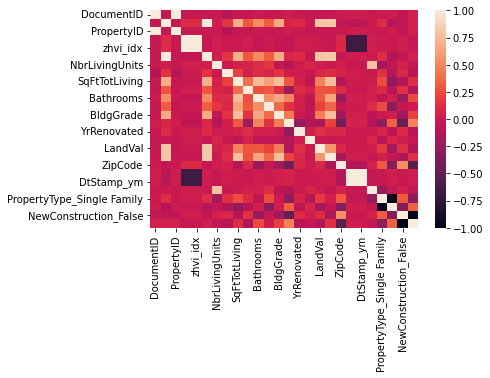

In [32]:
sns.heatmap(house_prices.corr())
plt.show()

In [33]:
house_prices.columns

Index(['DocumentID', 'SalePrice', 'PropertyID', 'zhvi_px', 'zhvi_idx',
       'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot', 'SqFtTotLiving',
       'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'YrBuilt',
       'YrRenovated', 'TrafficNoise', 'LandVal', 'ImpsVal', 'ZipCode',
       'DtStamp', 'DtStamp_ym', 'PropertyType_Multiplex',
       'PropertyType_Single Family', 'PropertyType_Townhouse',
       'NewConstruction_False', 'NewConstruction_True'],
      dtype='object')

In [34]:
input_features = [ 'zhvi_px', 'zhvi_idx', 'NbrLivingUnits', 'SqFtLot', 'SqFtTotLiving',
       'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'YrBuilt',
       'YrRenovated', 'TrafficNoise', 'LandVal', 'ImpsVal', 'ZipCode',
       'DtStamp', 'DtStamp_ym', 'PropertyType_Multiplex',
       'PropertyType_Single Family', 'PropertyType_Townhouse',
       'NewConstruction_False', 'NewConstruction_True']

label_column = ['SalePrice']

In [35]:
len(input_features)

22

In [36]:
X = house_prices[input_features]#.values

Y = house_prices[label_column]#.values

split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)

In [37]:
len(input_features)

22

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  LassoLarsIC

## TODO : fit (x,y)
# algo + data --> model
#model = LinearRegression ().fit(x, y)  # <--- training

algo = LassoLarsIC(criterion='aic', max_iter=500)
model = algo.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/c

In [39]:
model

LassoLarsIC()

In [40]:
predictions = model.predict(X_train)
predictions

array([371625.41, 344744.54, 386110.51, ..., 212986.24, 499294.01,
       385900.59])

In [41]:
coef = pd.DataFrame({"input_column" : input_features,  
                     "coefficient": model.coef_})
coef

,input_column,coefficient
0,zhvi_px,0.00
1,zhvi_idx,"475,901.69"
2,NbrLivingUnits,-902.91
3,SqFtLot,0.28
4,SqFtTotLiving,28.67
5,SqFtFinBasement,0.00
6,Bathrooms,197.24
7,Bedrooms,"-1,302.80"
8,BldgGrade,"13,769.53"
9,YrBuilt,0.00


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  LassoLarsIC

## TODO : fit (x,y)
# algo + data --> model
#model = LinearRegression ().fit(x, y)  # <--- training

algo2 = LinearRegression()
model = algo.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/c

In [43]:
coef2 = pd.DataFrame({"input_column" : input_features,  
                     "coefficient": model.coef_})
coef2

,input_column,coefficient
0,zhvi_px,0.00
1,zhvi_idx,"475,901.69"
2,NbrLivingUnits,-902.91
3,SqFtLot,0.28
4,SqFtTotLiving,28.67
5,SqFtFinBasement,0.00
6,Bathrooms,197.24
7,Bedrooms,"-1,302.80"
8,BldgGrade,"13,769.53"
9,YrBuilt,0.00
